In [ ]:
import gym
import numpy as np
import random
!pip install pygame 

import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Surface(640x480x32 SW)>

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install gym-notebook-wrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


In [ ]:
import gnwrapper
!sudo apt update && sudo apt install xvfb
!sudo apt update && sudo apt install python3-opengl

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,341 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,157 kB]
Get:14 http://secu

In [ ]:
desc = ["SFFF", 
        "FHFF", 
        "FGFF", 
        "HHFF"]
desc = np.asarray(desc, dtype="c")
e = gnwrapper.LoopAnimation(gym.make('FrozenLake-v1', render_mode="rgb_array",desc=desc,is_slippery=True))
e.reset()
done=False
reward = 0
# STATES =[0,1,2,3
          #4,5,6,7
           #8,9,10,11
           #12,13,14,15]
ACTION_MAP = {0: 'Left', 1: 'Down', 2: 'Right', 3: 'Up'}
for i in range(20):
  if done:
    break
  a=e.action_space.sample()
  action_taken =ACTION_MAP[a]
  s,reward,done,info=e.step(a)
  print("Action taken-",action_taken ,"state Reached-",s)
  e.render()
e.display()

Action taken- Up state Reached- 1
Action taken- Up state Reached- 2
Action taken- Right state Reached- 3
Action taken- Up state Reached- 3
Action taken- Left state Reached- 7
Action taken- Up state Reached- 7
Action taken- Down state Reached- 11
Action taken- Down state Reached- 15
Action taken- Left state Reached- 15
Action taken- Down state Reached- 14
Action taken- Right state Reached- 14
Action taken- Left state Reached- 13


Changing desc will change the environment accordingly

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

In [ ]:
e.P[1][3] #Probabilities of taking Up action at state 1

[(0.3333333333333333, 2, 0.0, False),
 (0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False)]

In [ ]:
print (e.action_space)
print (e.observation_space)

Discrete(4)
Discrete(16)


In [ ]:
q_table = np.zeros([e.observation_space.n, e.action_space.n])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
total_episodes = 5000
learning_rate = 0.7
gamma = 0.95
train_rewards = []

In [ ]:
#print('Q-table before training:')
#print(q_table)

# Training
for _ in range(total_episodes):
    state = e.reset()
    done = False
    total_rewards=0
    while not done:
      #Greedy policy
        if np.max(q_table[state]) > 0:
          ep=random.uniform(0,1)
          if ep>0.2:
            action = np.argmax(q_table[state])
          else:
            action = e.action_space.sample()
        else:
          action = e.action_space.sample()
        new_state, reward, done, info = e.step(action)
        q_table[state, action] = q_table[state, action] + learning_rate * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])
        total_rewards+=reward
        state = new_state
        train_rewards.append(total_rewards)
#print("Score over time: " + str(sum(train_rewards)/total_episodes))
print('Training done')



Training done


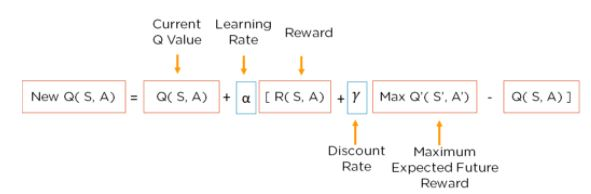

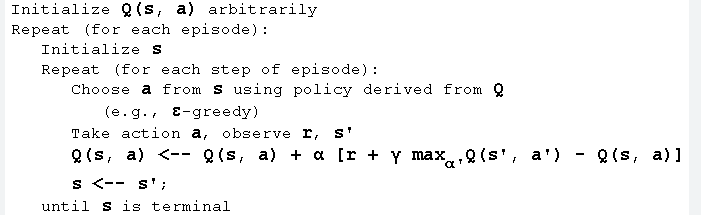

In [ ]:
q_table

array([[0.46426652, 0.46806242, 0.37951743, 0.45081388],
       [0.11208487, 0.38075954, 0.14986653, 0.48070835],
       [0.42535314, 0.41825832, 0.41453747, 0.41309084],
       [0.41629545, 0.41923219, 0.4046328 , 0.41184698],
       [0.7062775 , 0.19805297, 0.20375705, 0.04260717],
       [0.        , 0.        , 0.        , 0.        ],
       [0.53573214, 0.1685339 , 0.52213832, 0.18727753],
       [0.40174129, 0.64531451, 0.42120463, 0.41807981],
       [0.40324141, 0.54942665, 0.15831875, 0.95282072],
       [0.        , 0.        , 0.        , 0.        ],
       [0.58486493, 0.61073569, 0.60674397, 0.91058456],
       [0.47062387, 0.54880608, 0.46437556, 0.44945888],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11667349, 0.44293224, 0.74472767, 0.03605527],
       [0.55137795, 0.49078319, 0.46526995, 0.48191447]])

In [ ]:
episodes=50

In [ ]:
e.reset()
test_rewards = []
q_steps=[]
q_fall=0
q_reward=0
for episode in range(episodes):
    state = e.reset()
    step = 0
    done = False
    total_rewards = 0
    # list_action = []
    print("\n********************************************")
    print("EPISODE ", episode)

    for step in range(100):
        action = np.argmax(q_table[state, :])
        # list_action.append(action)
        new_state, reward, done, info = e.step(action)
        action_taken =ACTION_MAP[action]
        print(action_taken,new_state," ")
        if reward:
            e.render()
            #e.display()
            print("We reached our Goal !")
            # print("Number of steps", step+1)
            q_steps.append(step+1)
            q_reward+=1
            total_rewards += reward
            break
        if done:
          q_steps.append(0)
          q_fall+=1
          print("Fell into hole")
          break
        if step==99:
          q_steps.append(0)
          break
        state = new_state
    print(total_rewards)
    test_rewards.append(total_rewards)

print("Score over time: " + str(sum(test_rewards)/5))
print("\n Testing over!")
e.close()


********************************************
EPISODE  0
Down 0  
Down 0  
Down 0  
Down 4  
Left 8  
Up 8  
Up 8  
Up 9  
We reached our Goal !
1.0

********************************************
EPISODE  1
Down 0  
Down 4  
Left 0  
Down 0  
Down 4  
Left 0  
Down 0  
Down 1  
Up 1  
Up 0  
Down 1  
Up 2  
Left 2  
Left 6  
Left 10  
Up 6  
Left 10  
Up 9  
We reached our Goal !
1.0

********************************************
EPISODE  2
Down 1  
Up 1  
Up 2  
Left 6  
Left 2  
Left 1  
Up 2  
Left 6  
Left 2  
Left 2  
Left 2  
Left 1  
Up 2  
Left 6  
Left 5  
Fell into hole
0

********************************************
EPISODE  3
Down 0  
Down 1  
Up 1  
Up 2  
Left 6  
Left 5  
Fell into hole
0

********************************************
EPISODE  4
Down 4  
Left 0  
Down 4  
Left 8  
Up 9  
We reached our Goal !
1.0

********************************************
EPISODE  5
Down 0  
Down 1  
Up 1  
Up 2  
Left 6  
Left 5  
Fell into hole
0

**************************************

After training using Q-learning ,  the agent is also able to navigate to the goal with the help of the qtable and the experience it has gained. 

SARSA

In [ ]:
sar_table = np.zeros([e.observation_space.n, e.action_space.n])
total_episodes = 5000
learning_rate = 0.7
gamma = 0.95
train_rewards = []
#print(sar_table)

# Training
for _ in range(total_episodes):
    state = e.reset()
    done = False
    total_rewards=0
    ep=random.uniform(0,1)
    if ep>0.4:
       action = np.argmax(sar_table[state])
    else:
       action = e.action_space.sample()
    while not done:
        new_state, reward, done, info = e.step(action)
      #Greedy policy
        ep=random.uniform(0,1)
        if ep>0.2:
          action2 = np.argmax(sar_table[new_state])
        else:
          action2 = e.action_space.sample()
        sar_table[state, action] = sar_table[state, action] + learning_rate * (reward + gamma * (sar_table[new_state,action2]) - sar_table[state, action])
        total_rewards+=reward
        state = new_state
        action=action2
        train_rewards.append(total_rewards)
#print("Score over time: " + str(sum(train_rewards)/total_episodes))
print('Training done')



Training done


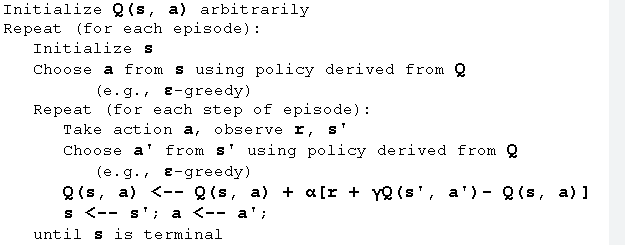

In [ ]:
sar_table

array([[0.10375313, 0.06741102, 0.10966938, 0.10995629],
       [0.02812621, 0.03496607, 0.04905131, 0.10471086],
       [0.12889218, 0.1731488 , 0.24894354, 0.13672391],
       [0.2070277 , 0.13792004, 0.25419431, 0.10731512],
       [0.23323658, 0.05853995, 0.0045031 , 0.00871571],
       [0.        , 0.        , 0.        , 0.        ],
       [0.06888806, 0.13487104, 0.23241033, 0.14785821],
       [0.13145512, 0.24880309, 0.16678872, 0.14588602],
       [0.09228293, 0.2661597 , 0.70730087, 0.96962272],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1211942 , 0.21733789, 0.14075556, 0.93186843],
       [0.14479137, 0.18245942, 0.27950544, 0.29908727],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.06506573, 0.04531458, 0.5643062 , 0.02281074],
       [0.21021904, 0.18620818, 0.20586588, 0.09366354]])

In [ ]:
e.reset()
test_rewards = []
sarsa_steps=[]
s_reward=0
s_fall=0
for episode in range(50):
    state = e.reset()
    step = 0
    done = False
    total_rewards = 0
    # list_action = []
    print("\n********************************************")
    print("EPISODE ", episode)

    for step in range(200):
        action = np.argmax(sar_table[state, :])
        # list_action.append(action)
        new_state, reward, done, info = e.step(action)
        action_taken =ACTION_MAP[action]
        print(action_taken,new_state," ")
        if reward:
            e.render()
            #e.display()
            print("We reached our Goal !")
            # print("Number of steps", step+1)
            sarsa_steps.append(step+1)
            total_rewards += reward
            s_reward+=1
            break
        if done:
          print("Fell into hole")
          s_fall+=1
          sarsa_steps.append(0)
          break
        state = new_state
    print(total_rewards)
    test_rewards.append(total_rewards)

print("Score over time: " + str(sum(test_rewards)/5))
print("\n Testing over!")
e.close()


********************************************
EPISODE  0
Up 0  
Up 0  
Up 1  
Up 1  
Up 2  
Right 6  
Right 10  
Up 11  
Up 7  
Down 6  
Right 10  
Up 9  
We reached our Goal !
1.0

********************************************
EPISODE  1
Up 0  
Up 0  
Up 1  
Up 1  
Up 1  
Up 2  
Right 3  
Right 3  
Right 7  
Down 6  
Right 7  
Down 11  
Up 10  
Up 11  
Up 10  
Up 6  
Right 2  
Right 6  
Right 7  
Down 11  
Up 10  
Up 6  
Right 10  
Up 11  
Up 11  
Up 7  
Down 6  
Right 7  
Down 11  
Up 7  
Down 11  
Up 7  
Down 6  
Right 10  
Up 11  
Up 11  
Up 11  
Up 10  
Up 9  
We reached our Goal !
1.0

********************************************
EPISODE  2
Up 0  
Up 0  
Up 1  
Up 1  
Up 1  
Up 2  
Right 2  
Right 6  
Right 7  
Down 6  
Right 7  
Down 6  
Right 7  
Down 7  
Down 7  
Down 6  
Right 10  
Up 9  
We reached our Goal !
1.0

********************************************
EPISODE  3
Up 0  
Up 0  
Up 1  
Up 2  
Right 3  
Right 7  
Down 7  
Down 11  
Up 7  
Down 11  
Up 7  
Down 7  
Down 6  

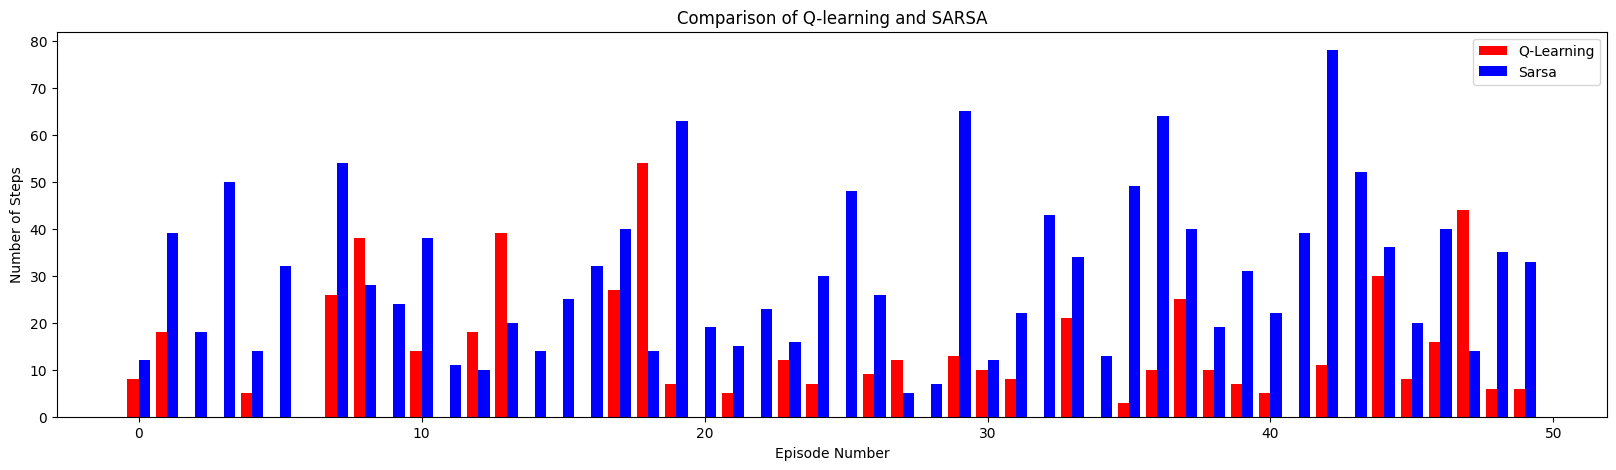

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
episodes=50
#print(q_steps,"\n",len(q_steps))
#print("\n",sarsa_steps,"\n",len(sarsa_steps))
plt.rcParams['figure.figsize'] = (20, 5)
axis=np.arange(episodes)
plt.bar(axis-0.2,q_steps,color="red",width=0.4)
plt.bar(axis+0.2,sarsa_steps,color="blue",width=0.4)
plt.legend(["Q-Learning","Sarsa"])
plt.xlabel("Episode Number")
plt.ylabel("Number of Steps")
plt.title("Comparison of Q-learning and SARSA")
plt.show()

Q-Learning  17 33
Sarsa  1 49


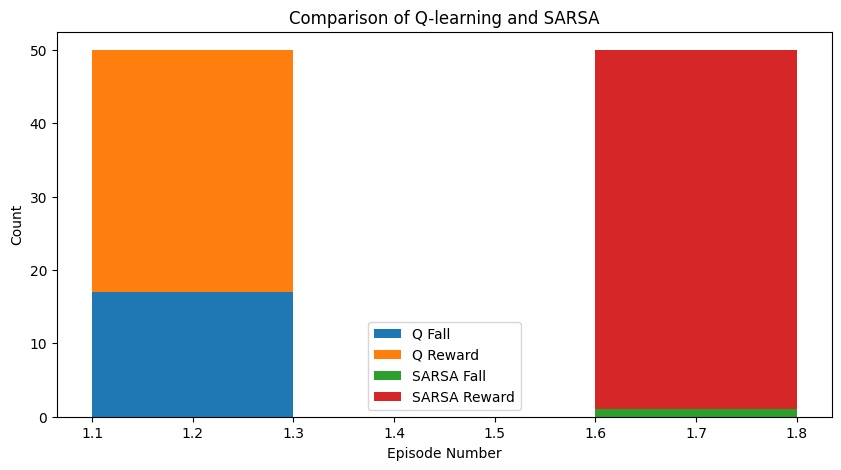

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

axis = np.arange(2)
print("Q-Learning ",q_fall,q_reward)
print("Sarsa ",s_fall,s_reward)
plt.rcParams['figure.figsize'] = (10, 5)
fig, ax = plt.subplots()
bar_width = 0.2
opacity=0.8
q_bars = ax.bar(1+bar_width, q_fall,bar_width, label='Q Fall')
q_bars = ax.bar(1+bar_width, q_reward,bar_width, bottom=q_fall, label='Q Reward')

s_bars = ax.bar(1 + bar_width+0.5, s_fall, bar_width, label='SARSA Fall')
s_bars = ax.bar(1 + bar_width+0.5, s_reward, bar_width, bottom=s_fall, label='SARSA Reward')


# Add labels and title
ax.set_xlabel('Episode Number')
ax.set_ylabel('Count')
ax.set_title('Comparison of Q-learning and SARSA')
ax.legend()
# Show the plot
plt.show()